# Sm-Nd Decay
```{index} Sm-Nd decay
```

In [17]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from math import log10, floor

In [18]:
# create our own functions
# function to round a value to a certain number of significant figures
def round_to_n_sf(value, no_of_significant_figures):
    value_rounded = round(value, no_of_significant_figures-1-int(floor(log10(abs(value)))))
    return value_rounded
            


## Sm-Nd Decay System

$${^{147}Sm \longrightarrow {^{143}Nd} + \alpha} \qquad t_{\frac{1}{2}} = 106\,Gyr$$

Both $Sm$ (samarium) and $Nd$ (neodymium) are Rare Earth Elements ($REEs$). In nature, both elements generally occur in dispersed form, with typical concentrations in mantle and crustal rocks of less than $\sim20\,ppm$. 

Most $REEs$, including $Sm$ and $Nd$, occur as trivalent ($3+$) ions with ionic radii that decrease systematically with increasing atomic number, so $Sm$ has a smaller ionic radius than $Nd$.

Both $Nd$ and $Sm$ are moderately incompatible elements, but $Nd$ is slightly more incompatible than $Sm$ during mantle melting because it has a slightly larger ionic radius. 

The $REEs$ are generally considered to be relatively resistant toward mobilization by fluids – they are fluid-immobile elements. 

## Dating of Terrestrial Rocks

The continental crust in general and siliceous rocks in particular have low and relatively uniform $Sm/Nd$ ratios (= parent/daughter ratio), so the $Sm$-$Nd$ system is not particularly suitable for dating such rocks. On the other hand, mafic and ultramafic rocks have variable and high $Sm/Nd$ ratios, so they are good candidates for Sm-Nd dating. 

Due to the fluid immobility of the $REEs$, $Sm$-$Nd$ ages and initial $Nd$ isotope compositions are not very sensitive to weathering and metamorphism. 

Notice how the $Sm$-$Nd$ system is opposite to the $Rb$-$Sr$ decay system in many ways! 


In [19]:
# Sm-Nd decay equation - very similar to the Rb-Sr one
# each return depends on what we want to find from the equation
def Sm_Nd_decay_equation(Nd143_Nd144_ratio, initial_Nd143_Nd144_ratio, Sm147_Nd144_ratio, t):
    decay_const_Sm = 6.54 * 10**-12  # yr^-1  # decay constant of Sm-147
    if Nd143_Nd144_ratio == '?':
        return initial_Nd143_Nd144_ratio + Sm147_Nd144_ratio*(np.exp(decay_const_Sm*t)-1)
    elif initial_Nd143_Nd144_ratio == '?':
        return Nd143_Nd144_ratio - Sm147_Nd144_ratio*(np.exp(decay_const_Sm*t)-1)
    elif Sm147_Nd144_ratio == '?':
        return (Nd143_Nd144_ratio - initial_Nd143_Nd144_ratio)/(np.exp(decay_const_Sm*t)-1)



## Problem Set 5

### Question 1

A pigeonite basalt ($12039$, $19$) from the Moon yielded the following results:

In [20]:
# create a dataframe to show the obtained results
samples = ["Whole rock", "Plagioclase", "Pyroxene"]
Sm147_Nd144_ratio = [0.2090, 0.1727, 0.2434]
Nd143_Nd144_ratio = [0.513142, 0.512365, 0.513861]

dict1 = {'Samples' : samples,
        '$${^{147}Sm}/{^{144}Nd}$$' : Sm147_Nd144_ratio,
        '$${^{143}Nd}/{^{144}Nd}$$' : Nd143_Nd144_ratio}
df1 = pd.DataFrame(dict1)
df1.loc[:, '$${^{147}Sm}/{^{144}Nd}$$'] = df1['$${^{147}Sm}/{^{144}Nd}$$'].map('{:.4f}'.format)
df1.loc[:, '$${^{143}Nd}/{^{144}Nd}$$'] = df1['$${^{143}Nd}/{^{144}Nd}$$'].map('{:.6f}'.format)
display(df1.style.hide_index())

Samples,$${^{147}Sm}/{^{144}Nd}$$,$${^{143}Nd}/{^{144}Nd}$$
Whole rock,0.2090,0.513142
Plagioclase,0.1727,0.512365
Pyroxene,0.2434,0.513861


a) Plot the data in an isochron diagram. Scale the y-axis from about ${^{143}Nd}/{^{144}Nd}$ = $0.5080$ to $0.5150$ and the x-axis from ${^{147}Sm}/{^{144}Nd}$ = $0$ to about $0.3$.

b) Determine the age and initial ${^{143}Nd}/{^{144}Nd}$ ratio of this rock from the slope and y-intercept of the isochron.

c) Calculate the $Nd$ isotope ratio of CHUR for the age of rock.

d) Express the initial $Nd$ isotope composition of the rock as an $\epsilon_{Nd}$ value relative to $CHUR$. What does the initial $\epsilon_{Nd}$ value tell you, if you assume that the Moon as a whole has chondritic $Sm/Nd$ and $Nd$ isotope ratios?

a) See below

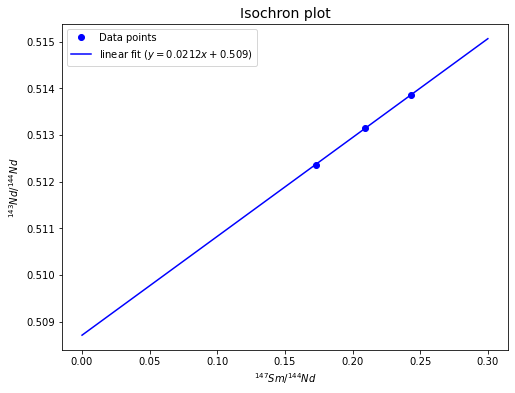

In [21]:
# Question 1a

# set figure size
plt.figure(figsize=(8,6))
# Plot data points
plt.plot(Sm147_Nd144_ratio, Nd143_Nd144_ratio, 'bo', label="Data points")
# plot isochron by fitting a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(Sm147_Nd144_ratio, Nd143_Nd144_ratio, 1)
p1 = np.poly1d(poly_coeffs)
slope = poly_coeffs[0]           # e^(\lambda t) - 1
y_intercept = poly_coeffs[1]   # initial Nd143/Nd144 ratio
x = np.linspace(0, 0.3, 10)  # Sm147/Nd144 ratio
plt.plot(x, p1(x), 'b', label="linear fit ($y = %gx + %g$)" % (round_to_n_sf(slope, 3), round_to_n_sf(y_intercept, 3)))
# label and title the plot
plt.xlabel('${^{147}Sm}/{^{144}Nd}$')
plt.ylabel('${^{143}Nd}/{^{144}Nd}$')
plt.title('Isochron plot', fontsize=14)
plt.legend(loc='best', fontsize=10)

b) Now we have already got the slope ($m$) and y-intercept ($b$) of the isochron, so we can estimate the age ($t$) and initial $Nd$-$143/Nd$-$144$ ratio ($({^{143}Nd}/{^{144}Nd})_0$) since

$$m = e^{\lambda t} - 1 \quad \longrightarrow \quad t = \frac{1}{\lambda}\ln(m+1)$$
$$b = \left(\frac{^{143}Nd}{^{144}Nd}\right)_0$$

In [22]:
# Question 1b

decay_const_Sm = 6.54 * 10**-12  # yr^-1  # decay constant of Sm-147
t = (1/decay_const_Sm) * np.log(slope + 1)  # age
b = y_intercept  # initial Nd143/Nd144 ratio
# print answers
print("The age implied by the isochron is %.2e yr." % t)
print("The initial Nd-143/Nd-144 ratio is %.6f." % b)

The age implied by the isochron is 3.20e+09 yr.
The initial Nd-143/Nd-144 ratio is 0.508713.


As the distribution and evolution of $Sm$ and $Nd$ in the Earth are not explained in this page where we focus on quantitative parts, we will recall the concepts of CHUR and $\epsilon_{Nd}$ from the lecture slide before attempting questions c and d.

CHUR (Chondritic Uniform Reservoir) is defined by the average present-day Sm/Nd ratio and Nd isotope composition of chondritic meteorites. It is representative for the $Nd$ isotope composition and evolution of the bulk Earth and bulk silicate Earth. The present-day $Nd$ isotope composition of chondrites is $({^{143}Nd}/{^{144}Nd})_{CHUR} = 0.512638$. The average $({^{147}Sm}/{^{144}Nd})_{CHUR} = 0.1967$. 

It is convenient to consider past and present variations in $Nd$ isotope compositions relative to the isotopic evolution of CHUR. This is done using the $\epsilon$ notation: 

$$\epsilon_{Nd} = \frac{({^{143}Nd}/{^{144}Nd}) - ({^{143}Nd}/{^{144}Nd})_{CHUR}}{({^{143}Nd}/{^{144}Nd})_{CHUR}} \times 10^4$$

$\epsilon_{Nd}$ values denote relative differences in $Nd$ isotope compositions (relative to CHUR) in parts per $10,000$.

c) From b), the age of the basalt is $3.20\,Gyr$. So, in this question, we are going to calculate $({^{143}Nd}/{^{144}Nd})_{CHUR}$ at $3.20\,Gya$ using the $Sm$-$Nd$ decay equation (very similar to $Rb$-$Sr$ decay equation):

$$\frac{^{143}Nd}{^{144}Nd} = \left(\frac{^{143}Nd}{^{144}Nd}\right)_0 + \frac{^{147}Sm}{^{144}Nd}(e^{\lambda t} - 1)$$

In this case:

$\quad {^{143}Nd}/{^{144}Nd} = ({^{143}Nd}/{^{144}Nd})_{CHUR,\,present} = 0.512638$

$\quad ({^{143}Nd}/{^{144}Nd})_0 = ({^{143}Nd}/{^{144}Nd})_{CHUR,\,3.20\,Gyr} =$ haven't know yet

$\quad {^{147}Sm}/{^{144}Nd} = ({^{147}Sm}/{^{144}Nd})_{CHUR,\,present} = 0.1967$

$\quad \lambda = 6.54 \times 10^{-12}\,yr^{-1}$

$\quad t = 3.20 \times 10^9\,yr$

In [23]:
# Question 1c

# Given values
Nd143_Nd144_ratio = 0.512638
Sm147_Nd144_ratio = 0.1967
t = 3.2 * 10**9  # yr
initial_Nd_ratio_CHUR = Sm_Nd_decay_equation(Nd143_Nd144_ratio, '?', Sm147_Nd144_ratio, t)  # Nd isotope ratio of CHUR at 3.20 Gya
# print answer
print("The Nd isotope ratio of CHUR at 3.20 Gya is %g." % round_to_n_sf(initial_Nd_ratio_CHUR, 6))

The Nd isotope ratio of CHUR at 3.20 Gya is 0.508478.


d) 

From b), the initial $Nd$ isotope ratio of the rock is $0.508713$.

From c), the initial $Nd$ isotope ratio of CHUR is $0.508478$.

Calculate the initial value of $\epsilon_{Nd}$ (at $t = 3.20\,Gyr$)

In [26]:
# function to calculate epsilon Nd
def epsilon_Nd(Nd_ratio_rock, Nd_ratio_CHUR):
    return (Nd_ratio_rock - Nd_ratio_CHUR)/Nd_ratio_CHUR * 10000


# Question 1d

# Given values
initial_Nd_ratio_rock = 0.508713
initial_Nd_ratio_CHUR = 0.508478
# print answer
print("The initial differences in Nd isotope compositions (relative to CHUR) of the rock in parts per 10,000 is %g." \
      % round_to_n_sf(epsilon_Nd(initial_Nd_ratio_rock, initial_Nd_ratio_CHUR), 3))

The initial differences in Nd isotope compositions (relative to CHUR) of the rock in parts per 10,000 is 4.62.


The positive $\epsilon_{Nd}$ initial value means that the rock comes from a depleted source. The depleted source is probably the lunar mantle, which was depleted by the formation of the lunar crust.

### Question 2

Neodymium model ages or crustal residence ages are obtained by calculating the intersection of the $Nd$ isotope evolution of a rock sample with the $Nd$ isotope evolution of a reservoir (RES) that is assumed to have a composition akin to CHUR (for $t_{CHUR}$) or a depleted mantle (DM) composition (for $t_{DM}$).

The respective Nd isotope evolutions evolution curves are given by:

Sample:  $$\left(\frac{^{143}Nd}{^{144}Nd}\right)_{Sam} = \left(\frac{^{143}Nd}{^{144}Nd}\right)_{Sam,0} + \left(\frac{^{147}Sm}{^{144}Nd}\right)_{Sam}(e^{\lambda t} - 1)$$

CHUR or DM reservoir: $$\left(\frac{^{143}Nd}{^{144}Nd}\right)_{Res} = \left(\frac{^{143}Nd}{^{144}Nd}\right)_{Res,0} + \left(\frac{^{147}Sm}{^{144}Nd}\right)_{Res}(e^{\lambda t} - 1)$$

The intersections is obtained by equating $\left(\frac{^{143}Nd}{^{144}Nd}\right)_{Sam,0} = \left(\frac{^{143}Nd}{^{144}Nd}\right)_{Res,0}$

After rearranging this yields for $t$:

$$t = \frac{1}{\lambda} \ln\left(\frac{\left(\frac{^{143}Nd}{^{144}Nd}\right)_{Sam} - \left(\frac{^{143}Nd}{^{144}Nd}\right)_{Res}}{\left(\frac{^{147}Sm}{^{144}Nd}\right)_{Sam} - \left(\frac{^{147}Sm}{^{144}Nd}\right)_{Res}} + 1\right)$$

Calculate the $t_{DM}$ for a sample characterized by ${^{147}Sm}/{^{144}Nd} = 0.102$ and ${^{143}Nd}/{^{144}Nd} =
0.511552$. The depleted mantle is assumed be characterized by ${^{147}Sm}/{^{144}Nd} = 0.222$ and ${^{143}Nd}/{^{144}Nd} =

0.513114$.

In [25]:
# Question 2 

# decay constant of Sm-147
decay_const = 6.54 * 10**-12  # yr^-1  
# isotopic ratios of the sample
Sm147_Nd144_ratio_sample = 0.102
Nd143_Nd144_ratio_sample = 0.511552
# isotopic ratios of the depleted mantle
Sm147_Nd144_ratio_DM = 0.222
Nd143_Nd144_ratio_DM = 0.513114
# calculate t
t = (1/decay_const) * np.log(((Nd143_Nd144_ratio_sample - Nd143_Nd144_ratio_DM)/(Sm147_Nd144_ratio_sample - Sm147_Nd144_ratio_DM)) + 1)
# print answer
print("The Nd model age is %.2e yrs." % t)

The Nd model age is 1.98e+09 yrs.


## References

- Lecture slide and Practical for Lecture 5 of the High-Temperature Geochemistry module